Data Collection And Cleaning

In [2]:
import pandas as pd

file_path = 'E-commerce Customer Behavior - Sheet1.csv'
data = pd.read_csv(file_path)

data.head()


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [3]:
print(data.isnull().sum())

data_cleaned = data.dropna()

data_cleaned = data_cleaned.drop_duplicates()

data_cleaned.columns = [col.strip().lower() for col in data_cleaned.columns]

print(data_cleaned.isnull().sum())

data_cleaned.head()


Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64
customer id                 0
gender                      0
age                         0
city                        0
membership type             0
total spend                 0
items purchased             0
average rating              0
discount applied            0
days since last purchase    0
satisfaction level          0
dtype: int64


,customer id,gender,age,city,membership type,total spend,items purchased,average rating,discount applied,days since last purchase,satisfaction level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


Initial Data Analysis

In [4]:
descriptive_stats = data_cleaned.describe()

print(descriptive_stats)


       customer id         age  total spend  items purchased  average rating  \
count   348.000000  348.000000   348.000000       348.000000      348.000000   
mean    275.887931   33.577586   847.793103        12.632184        4.023563   
std     101.304611    4.878024   361.692375         4.146079        0.579145   
min     101.000000   26.000000   410.800000         7.000000        3.000000   
25%     188.750000   30.000000   505.750000         9.000000        3.500000   
50%     276.500000   32.000000   780.200000        12.000000        4.100000   
75%     363.250000   37.000000  1160.600000        15.000000        4.500000   
max     450.000000   43.000000  1520.100000        21.000000        4.900000   

       days since last purchase  
count                348.000000  
mean                  26.614943  
std                   13.474750  
min                    9.000000  
25%                   15.000000  
50%                   23.000000  
75%                   38.000000  
max    

In [5]:
print(data_cleaned.columns)


Index(['customer id', 'gender', 'age', 'city', 'membership type',
       'total spend', 'items purchased', 'average rating', 'discount applied',
       'days since last purchase', 'satisfaction level'],
      dtype='object')


In [6]:
average_purchase_value = data_cleaned['total spend'].mean()

customer_clv = data_cleaned.groupby('customer id')['total spend'].sum()

print(f"Average Purchase Value: {average_purchase_value}")
print(f"Customer Lifetime Value:\n{customer_clv.head()}")


Average Purchase Value: 847.7931034482758
Customer Lifetime Value:
customer id
101    1120.20
102     780.50
103     510.75
104    1480.30
105     720.40
Name: total spend, dtype: float64


Trend Analysis

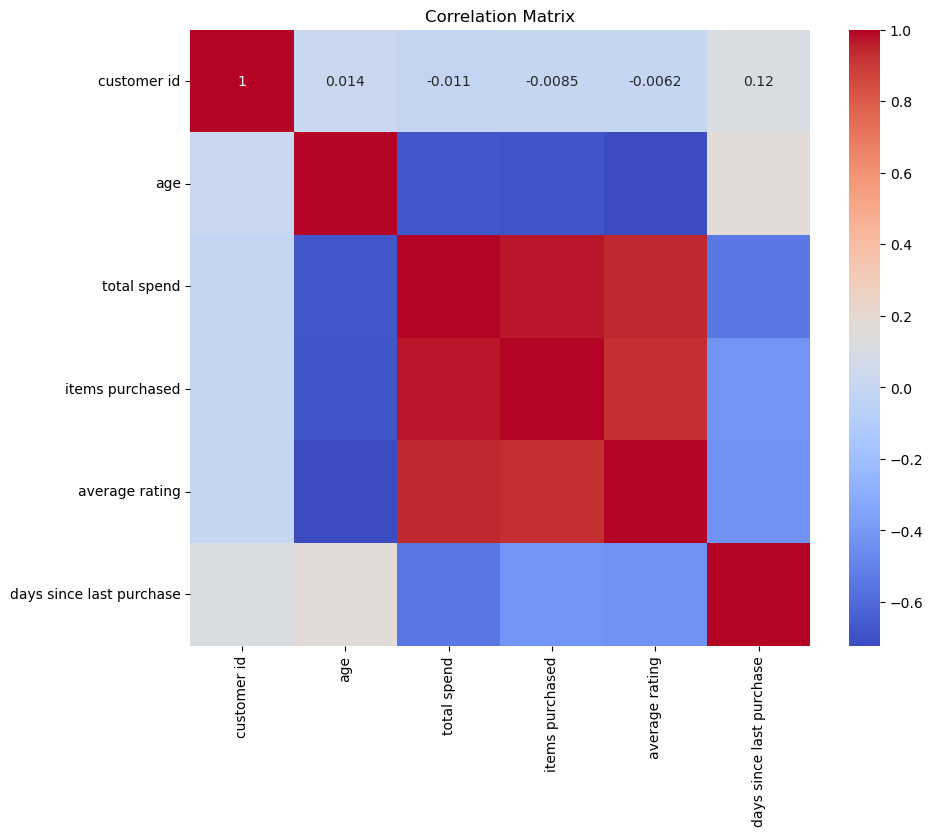

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
numeric_columns = data_cleaned.select_dtypes(include=np.number).columns

correlation_matrix = data_cleaned[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Data Visualization

In [10]:
data_cleaned.to_csv('cleaned_ecommerce_data.csv', index=False)


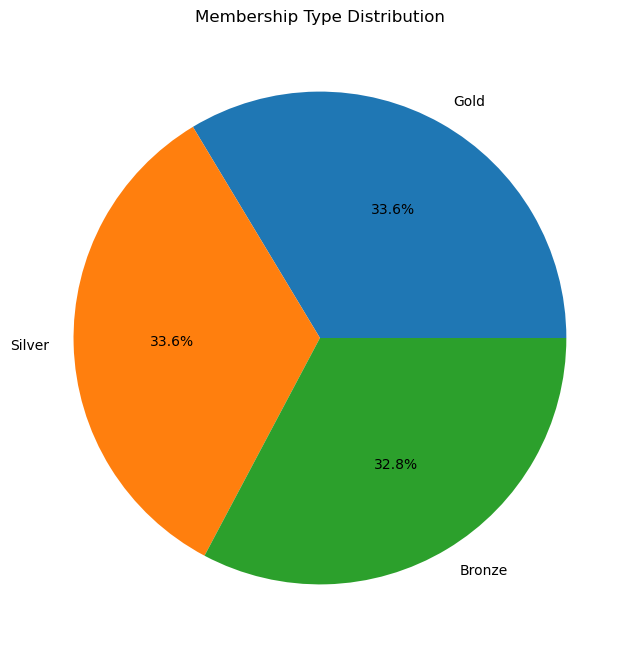

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

membership_type_distribution = data_cleaned['membership type'].value_counts()
membership_type_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Membership Type Distribution')
plt.ylabel('')
plt.show()


In [12]:

high_value_customers = customer_clv[customer_clv > customer_clv.quantile(0.9)]
print("High-value customers:\n", high_value_customers)

print("Recommendation: Target high-value customers with personalized marketing campaigns to increase retention and sales.")


High-value customers:
 customer id
104    1480.3
110    1520.1
122    1470.5
128    1500.1
146    1490.1
152    1470.5
158    1500.1
176    1490.1
182    1470.5
188    1500.1
206    1490.1
212    1470.5
218    1500.1
236    1490.1
242    1470.5
248    1490.1
254    1470.5
260    1500.1
278    1490.1
284    1470.5
290    1500.1
319    1490.1
325    1470.5
331    1500.1
349    1480.1
361    1490.1
373    1480.1
385    1490.1
397    1480.1
409    1490.1
421    1480.1
433    1490.1
445    1480.1
Name: total spend, dtype: float64
Recommendation: Target high-value customers with personalized marketing campaigns to increase retention and sales.


In [14]:
# Model Development: Predictive Modeling
X = data_cleaned.drop(['total spend'], axis=1)  # Features
y = data_cleaned['total spend']  # Target variable

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build machine learning model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation and Validation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

y_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Explained Variance Score
evs = explained_variance_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Mean Absolute Error:", mae)
print("Explained Variance Score:", evs)


Mean Squared Error: 78.44751429285316
R-squared Score: 0.9994524188234061
Mean Absolute Error: 4.672099999999835
Explained Variance Score: 0.9994535614133873
